In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

from pylab import rcParams
rcParams['legend.fontsize'] = 11
rcParams['figure.figsize'] = 7.8 ,3.9
plt.rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)
rcParams['figure.max_open_warning'] = 2000

In [184]:
files = os.listdir('C:\MessdatenICA\monitor1_cleangrid')

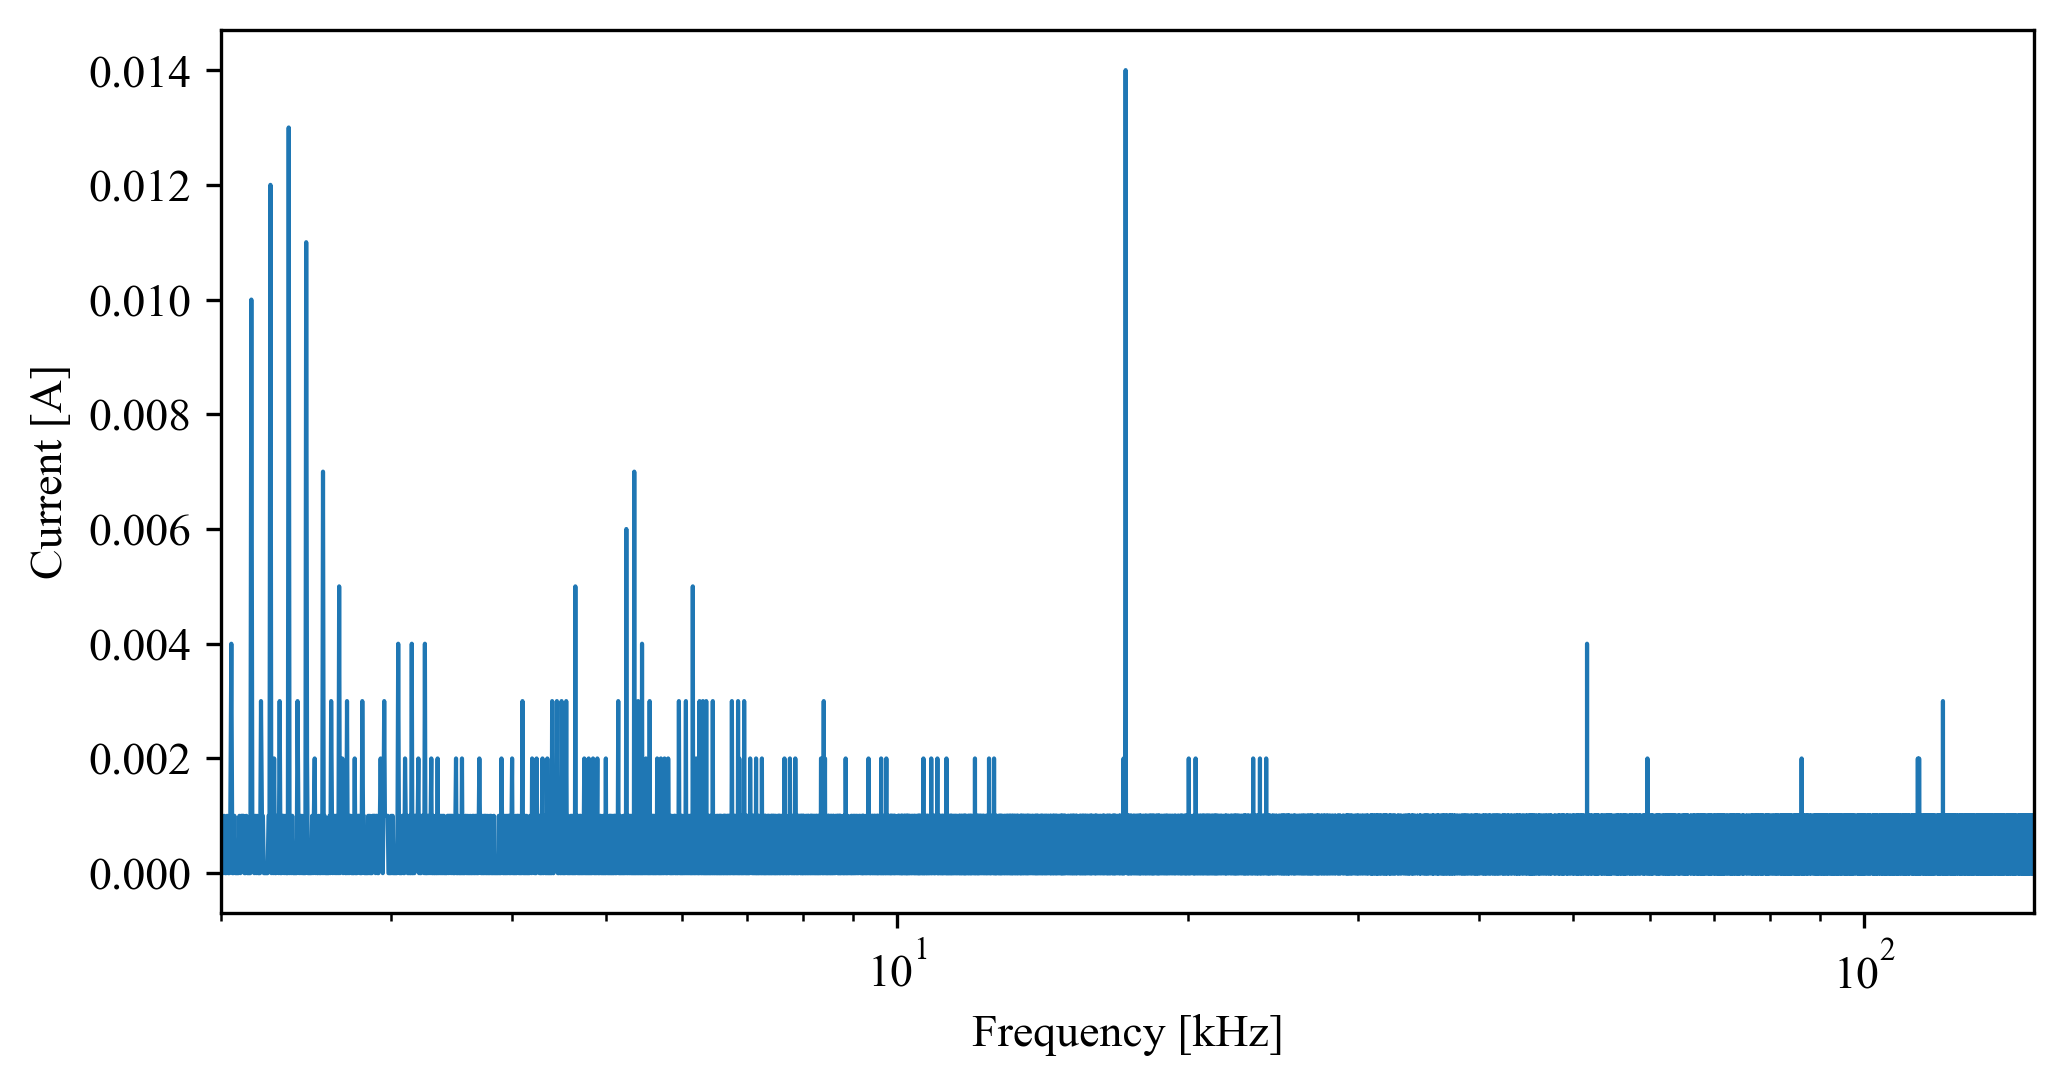

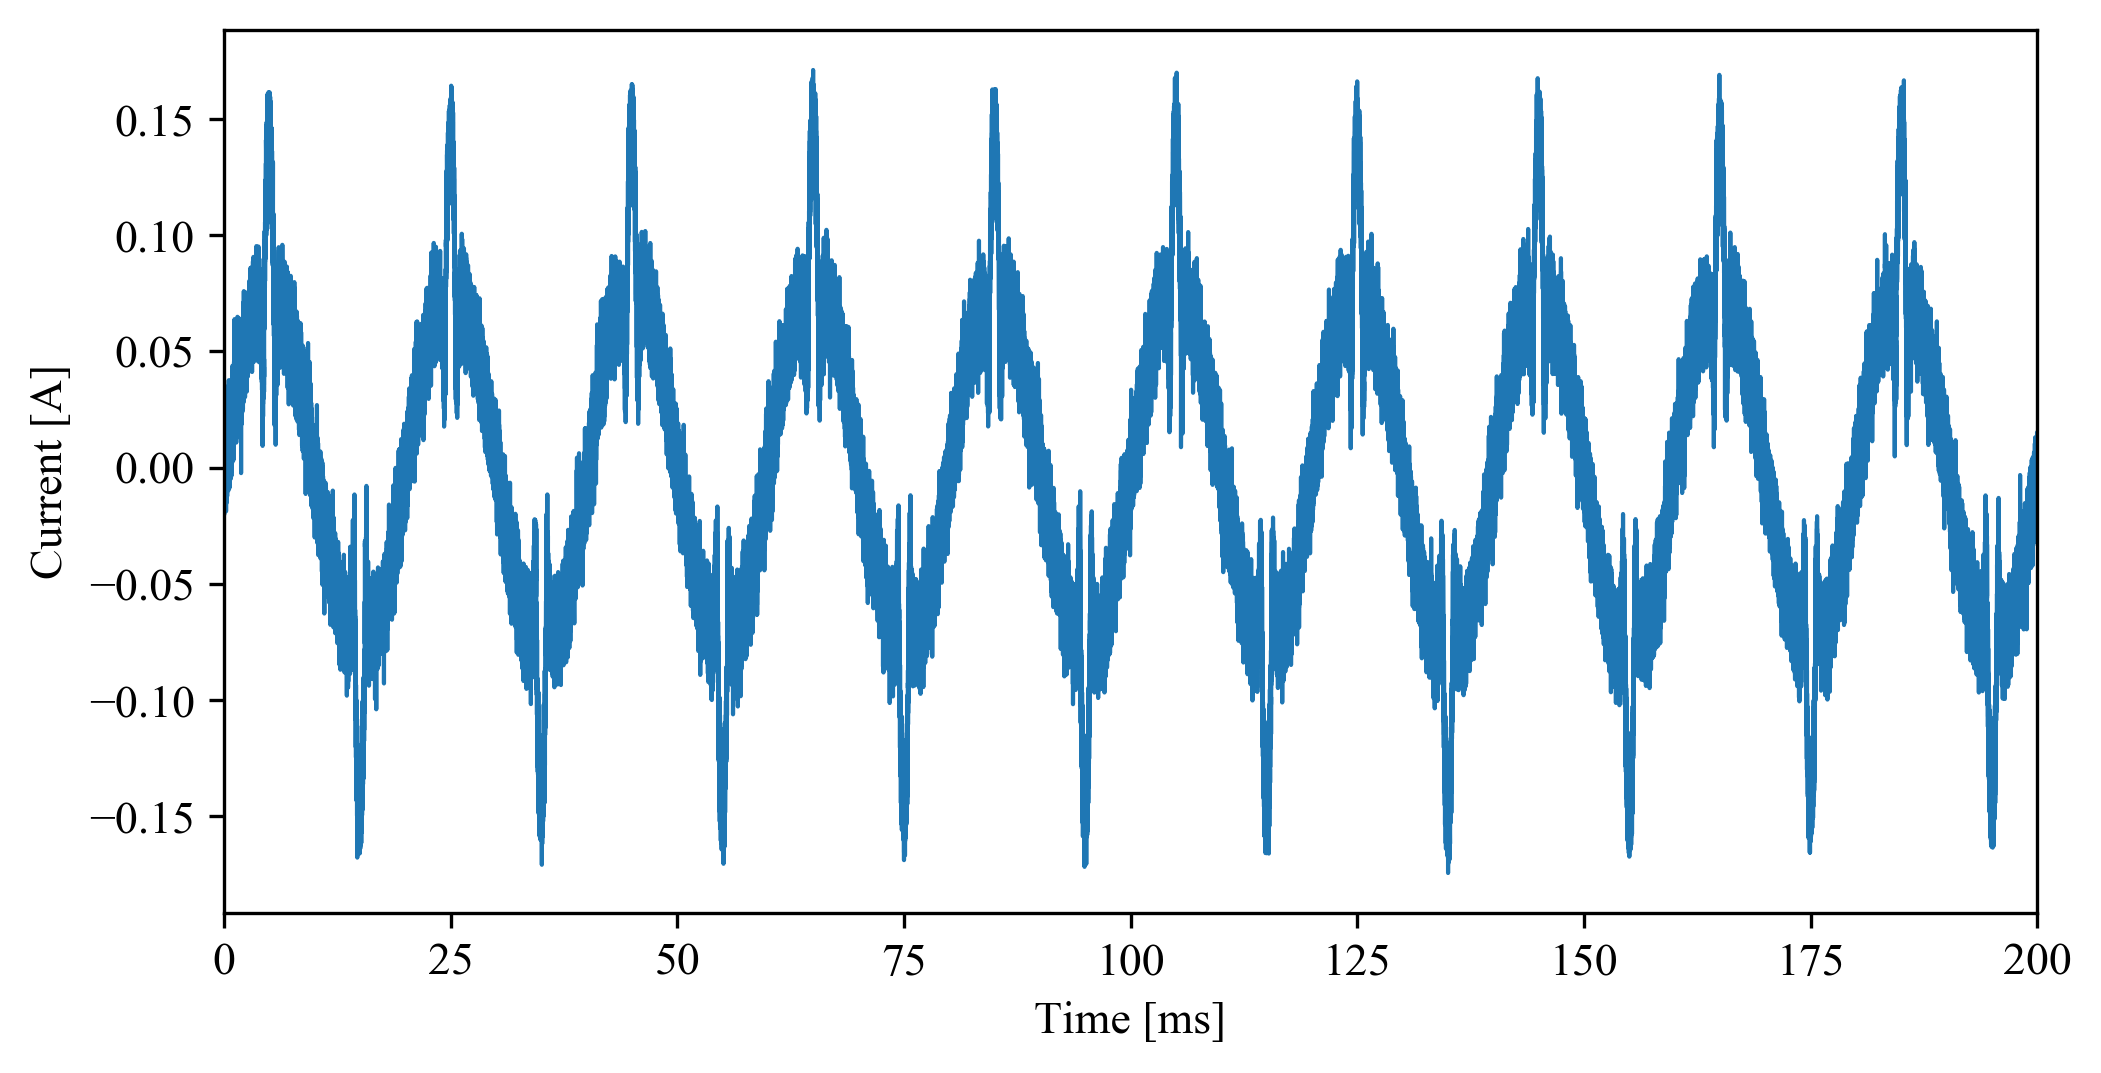

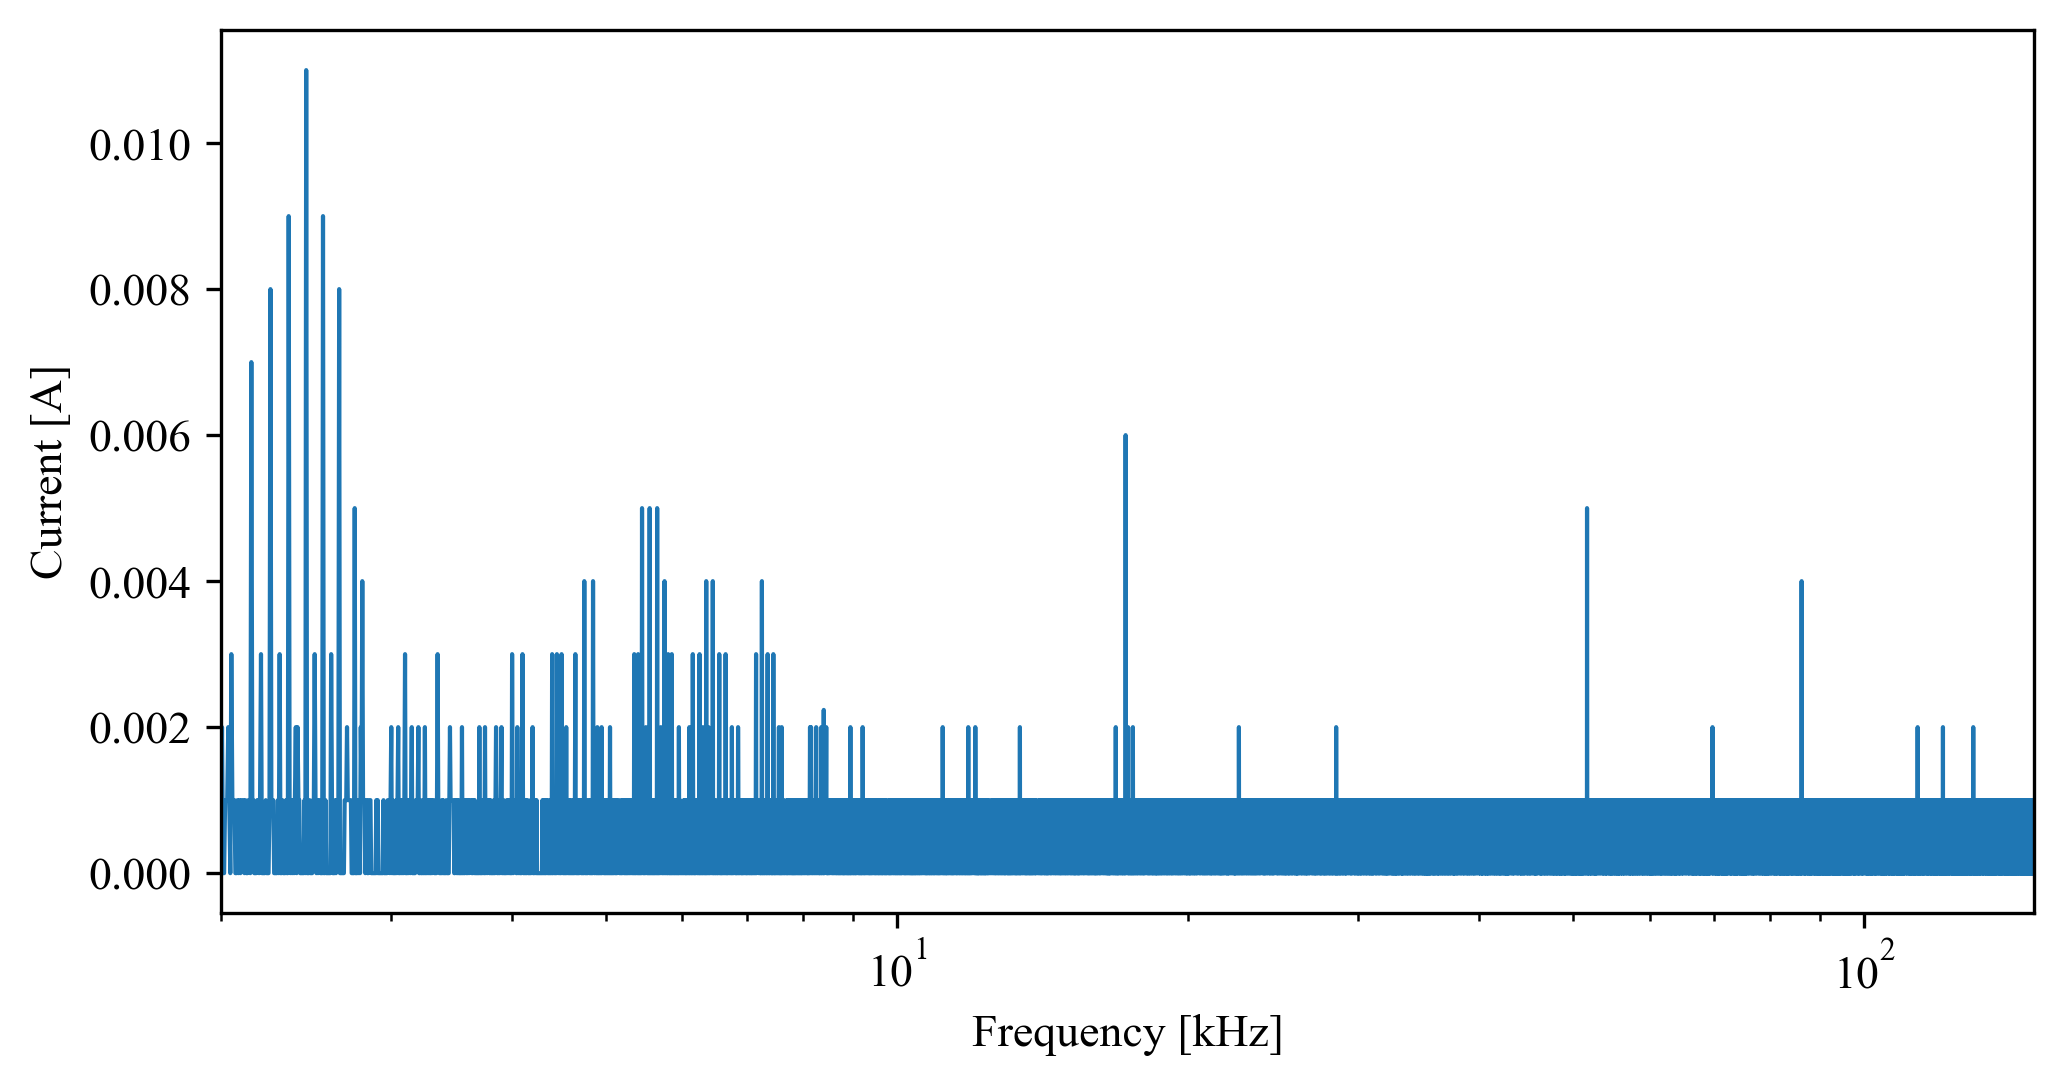

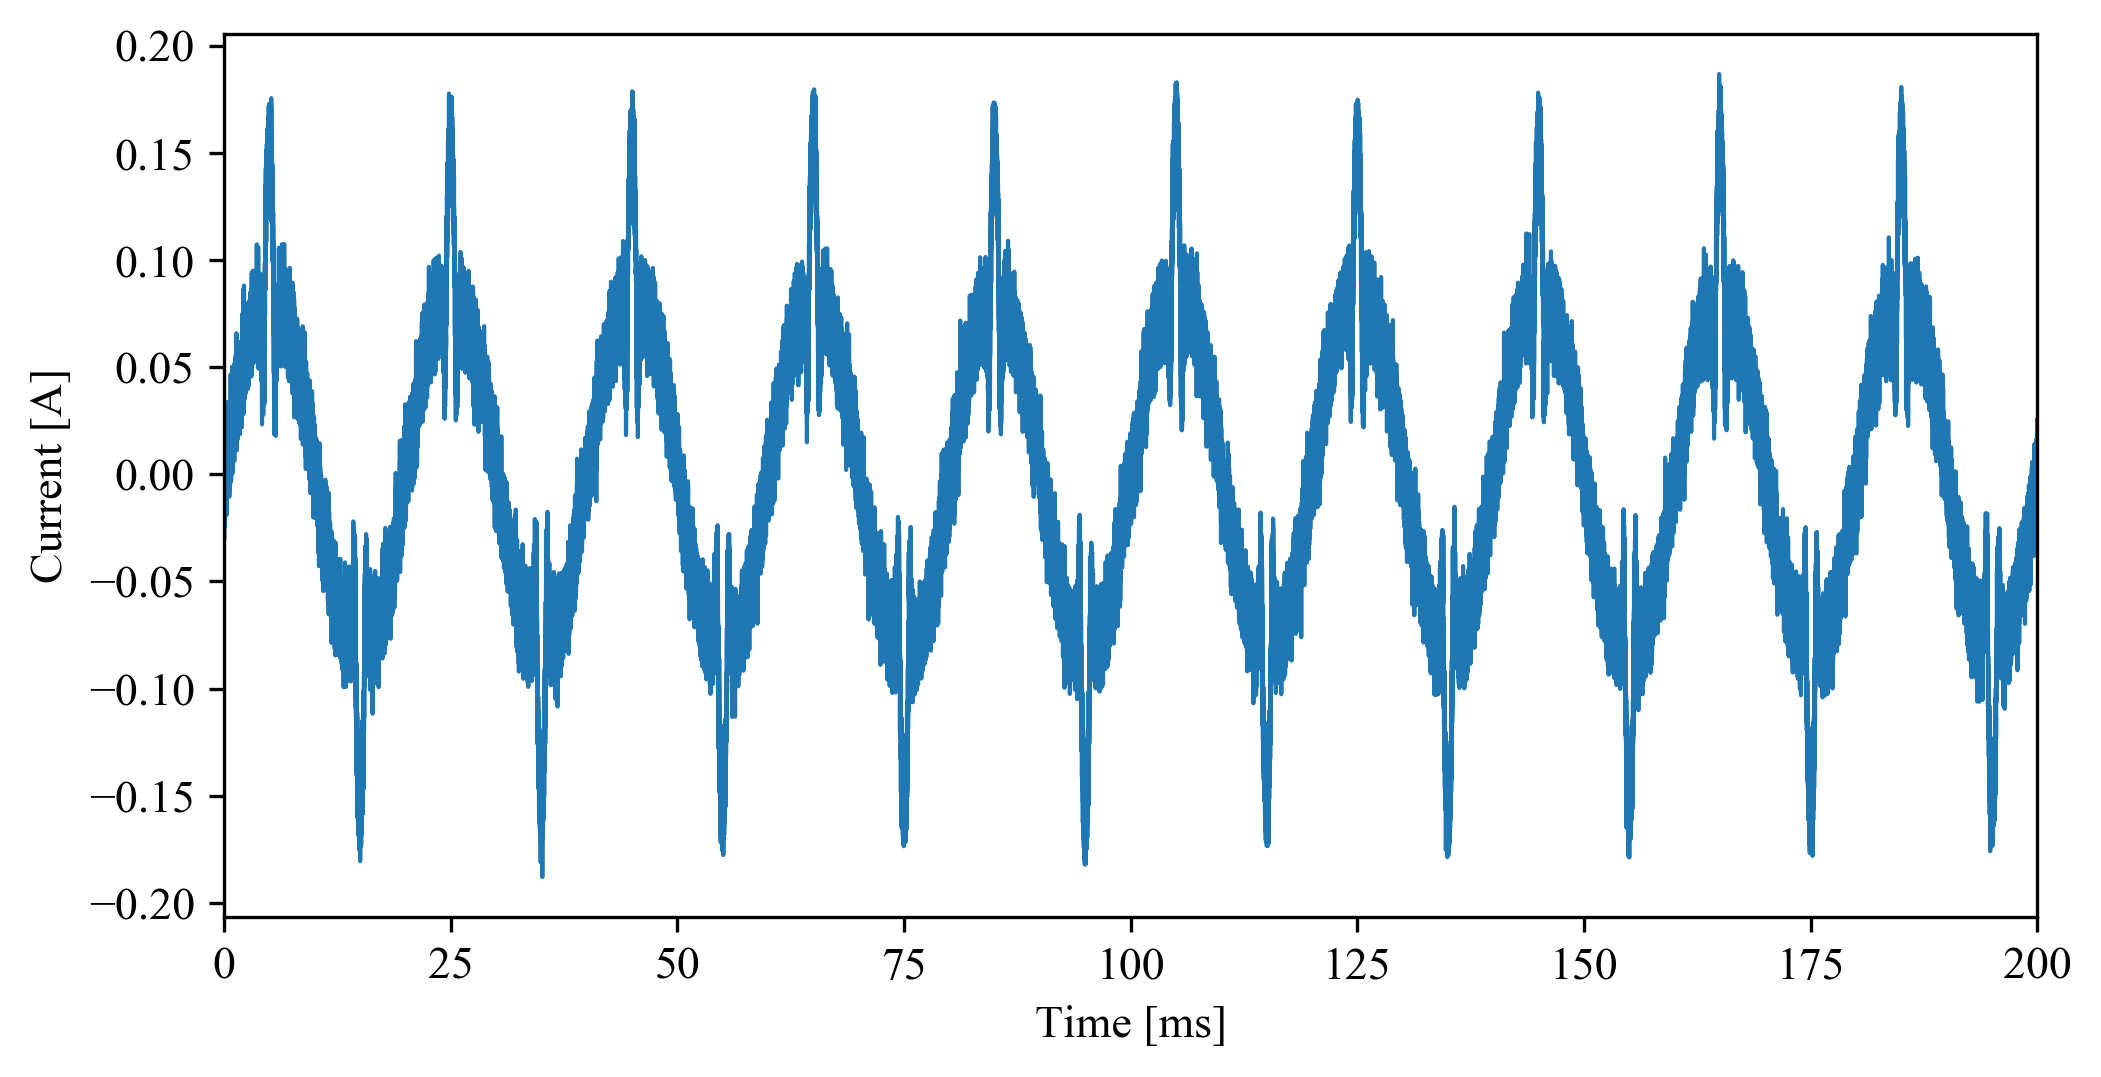

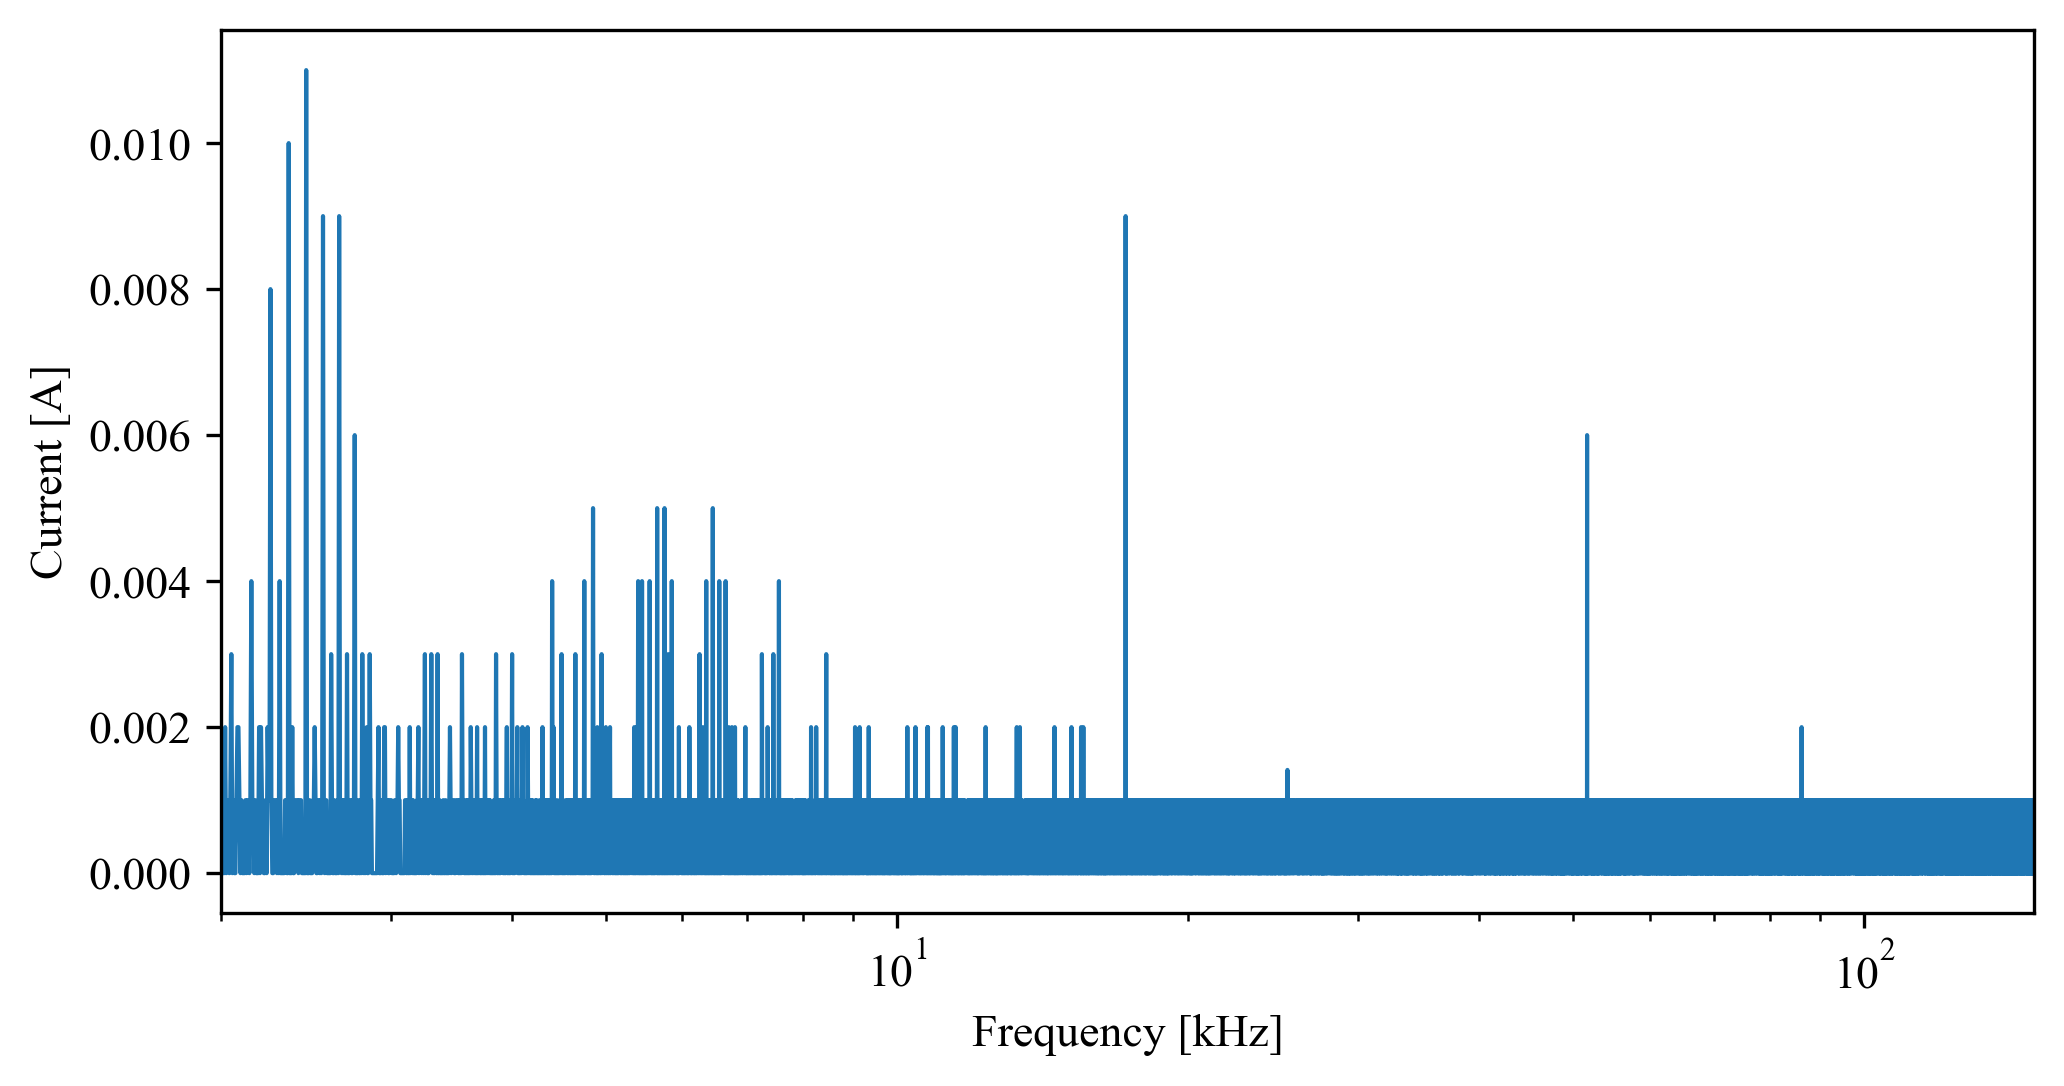

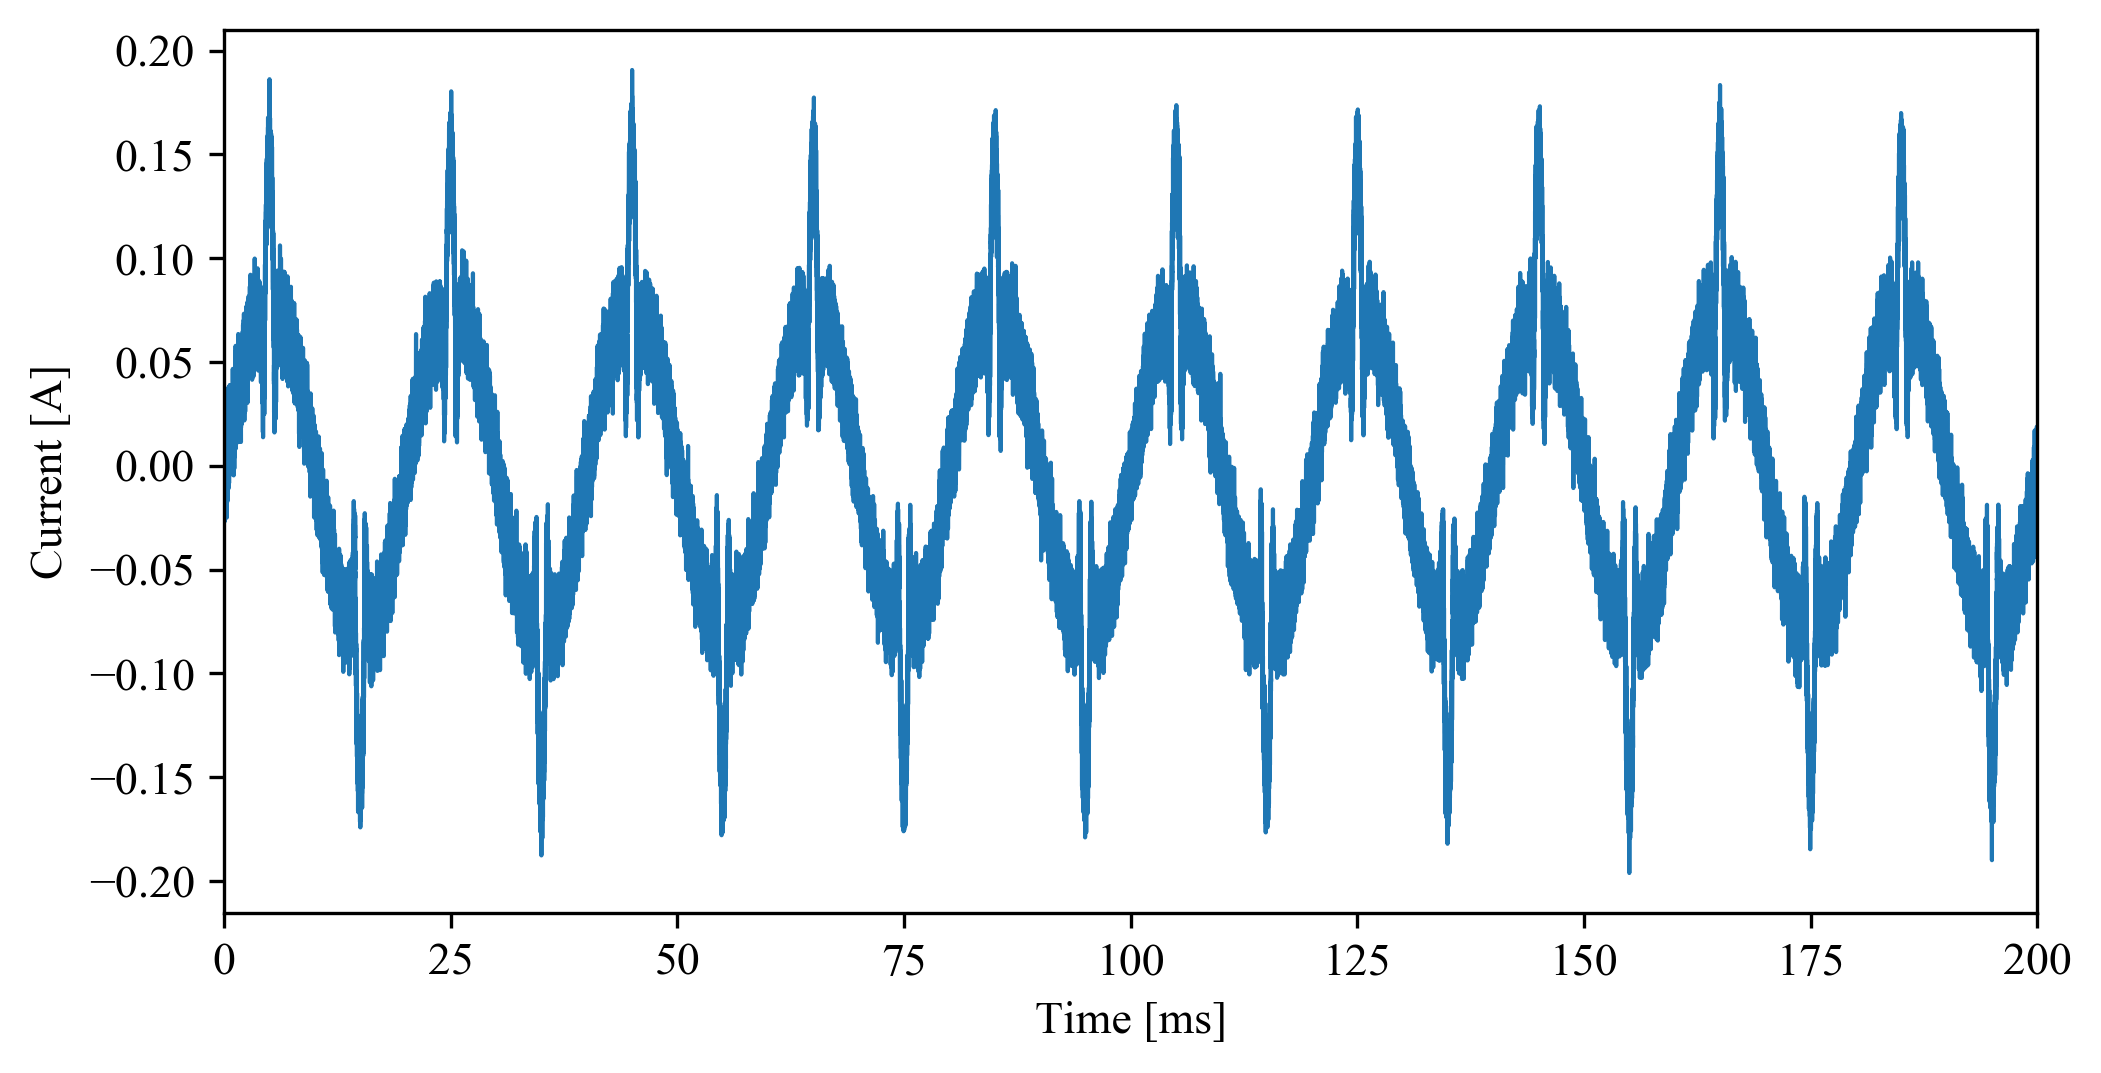

In [185]:
for f in files[::700]:
    file2 = pd.read_json('C:\MessdatenICA\monitor1_cleangrid\\' + f)
    n = np.zeros((file2.shape[0],), dtype=complex)
    n.real = file2['spectrum_i_real']
    n.imag = file2['spectrum_i_imag']
    absolutevals = np.absolute(n)
    
    absolutevals[:400]=0
    #absolutevals[400:]=0
    #n.real[:9] =0
    #n.real[11:400]=0
    #n.imag[:9]=0
    #n.real[11:400]=0
    

    
    xfreq = np.arange(file2.shape[0])
    xfreq *= 5
    xfreq = xfreq[400:]
    xfreq = xfreq[:29600]
    xfreq = xfreq / 1000

    fig, ax = plt.subplots()
    ax.set_xlabel("Frequency [kHz]")
    ax.set_ylabel('Current [A]')
    ax.set_xlim((2,150))
    ax.plot(xfreq,absolutevals[400:30000],  linewidth=1)
    ax.set_xscale('log')
    #ax[0].set_xlim(10, xfreq[-1])

    s = np.fft.ifft(n)
    t = np.linspace(0, 200, file2.shape[0])
    fig, ax = plt.subplots()
    ax.plot(t, 0.1*s.real*file2.shape[0],  linewidth=1)
    ax.set_xlabel("Time [ms]")
    ax.set_ylabel('Current [A]')
    ax.set_xlim((0,200))
    #fig.tight_layout()

In [ ]:
n[0:9] = 0
n[11:] = 0

In [ ]:
s = np.fft.ifft(n)
t = np.arange(file2.shape[0])
ig, ax = plt.subplots()
plt.plot(t, s.real*file2.shape[0])

In [162]:
timeseries = []
files = os.listdir('C:\MessdatenICA\lamp_cleangrid')
for file in files[::10]:
    values = pd.read_json('C:\MessdatenICA\lamp_cleangrid\\' + file)
    n = np.zeros((values.shape[0],), dtype=complex)
    n.real = values['spectrum_i_real']
    n.imag = values['spectrum_i_imag']
    n[:400] = 0
    n[30000:]=0
    s = np.fft.ifft(n)
    timeseries.append(s.real[:99950])

In [163]:
files = os.listdir('C:\MessdatenICA\monitor1_cleangrid')
for file in files[::10]:
    values = pd.read_json('C:\MessdatenICA\monitor1_cleangrid\\' + file)
    n = np.zeros((values.shape[0],), dtype=complex)
    n.real = values['spectrum_i_real']
    n.imag = values['spectrum_i_imag']
    n[:400] = 0
    n[30000:]=0
    s = np.fft.ifft(n)
    timeseries.append(s.real[:99950])

In [143]:
files = os.listdir('C:\MessdatenICA\lamp-monitor_cleangrid')
for file in files[::20]:
    values = pd.read_json('C:\MessdatenICA\lamp-monitor_cleangrid\\' + file)
    n = np.zeros((values.shape[0],), dtype=complex)
    n.real = values['spectrum_i_real']
    n.imag = values['spectrum_i_imag']
    n[:400] = 0
    n[30000:]=0
    s = np.fft.ifft(n)
    timeseries.append(s.real[:99950])

In [119]:
files = os.listdir('C:\MessdatenICA\lamp-monitor_grid')
for file in files[::]:
    values = pd.read_json('C:\MessdatenICA\lamp-monitor_grid\\' + file)
    n = np.zeros((values.shape[0],), dtype=complex)
    n.real = values['spectrum_i_real']
    n.imag = values['spectrum_i_imag']
    n[:400] = 0
    n[30000:]=0
    s = np.fft.ifft(n)
    timeseries.append(s.real[:99950])

In [164]:
Ah = np.vstack(timeseries)

In [166]:
ica = FastICA(2)
S_ = ica.fit_transform(Ah.T)  # Reconstruct signals
#A_ = ica.mixing_  # Get estimated mixing matrix

(0, 200)

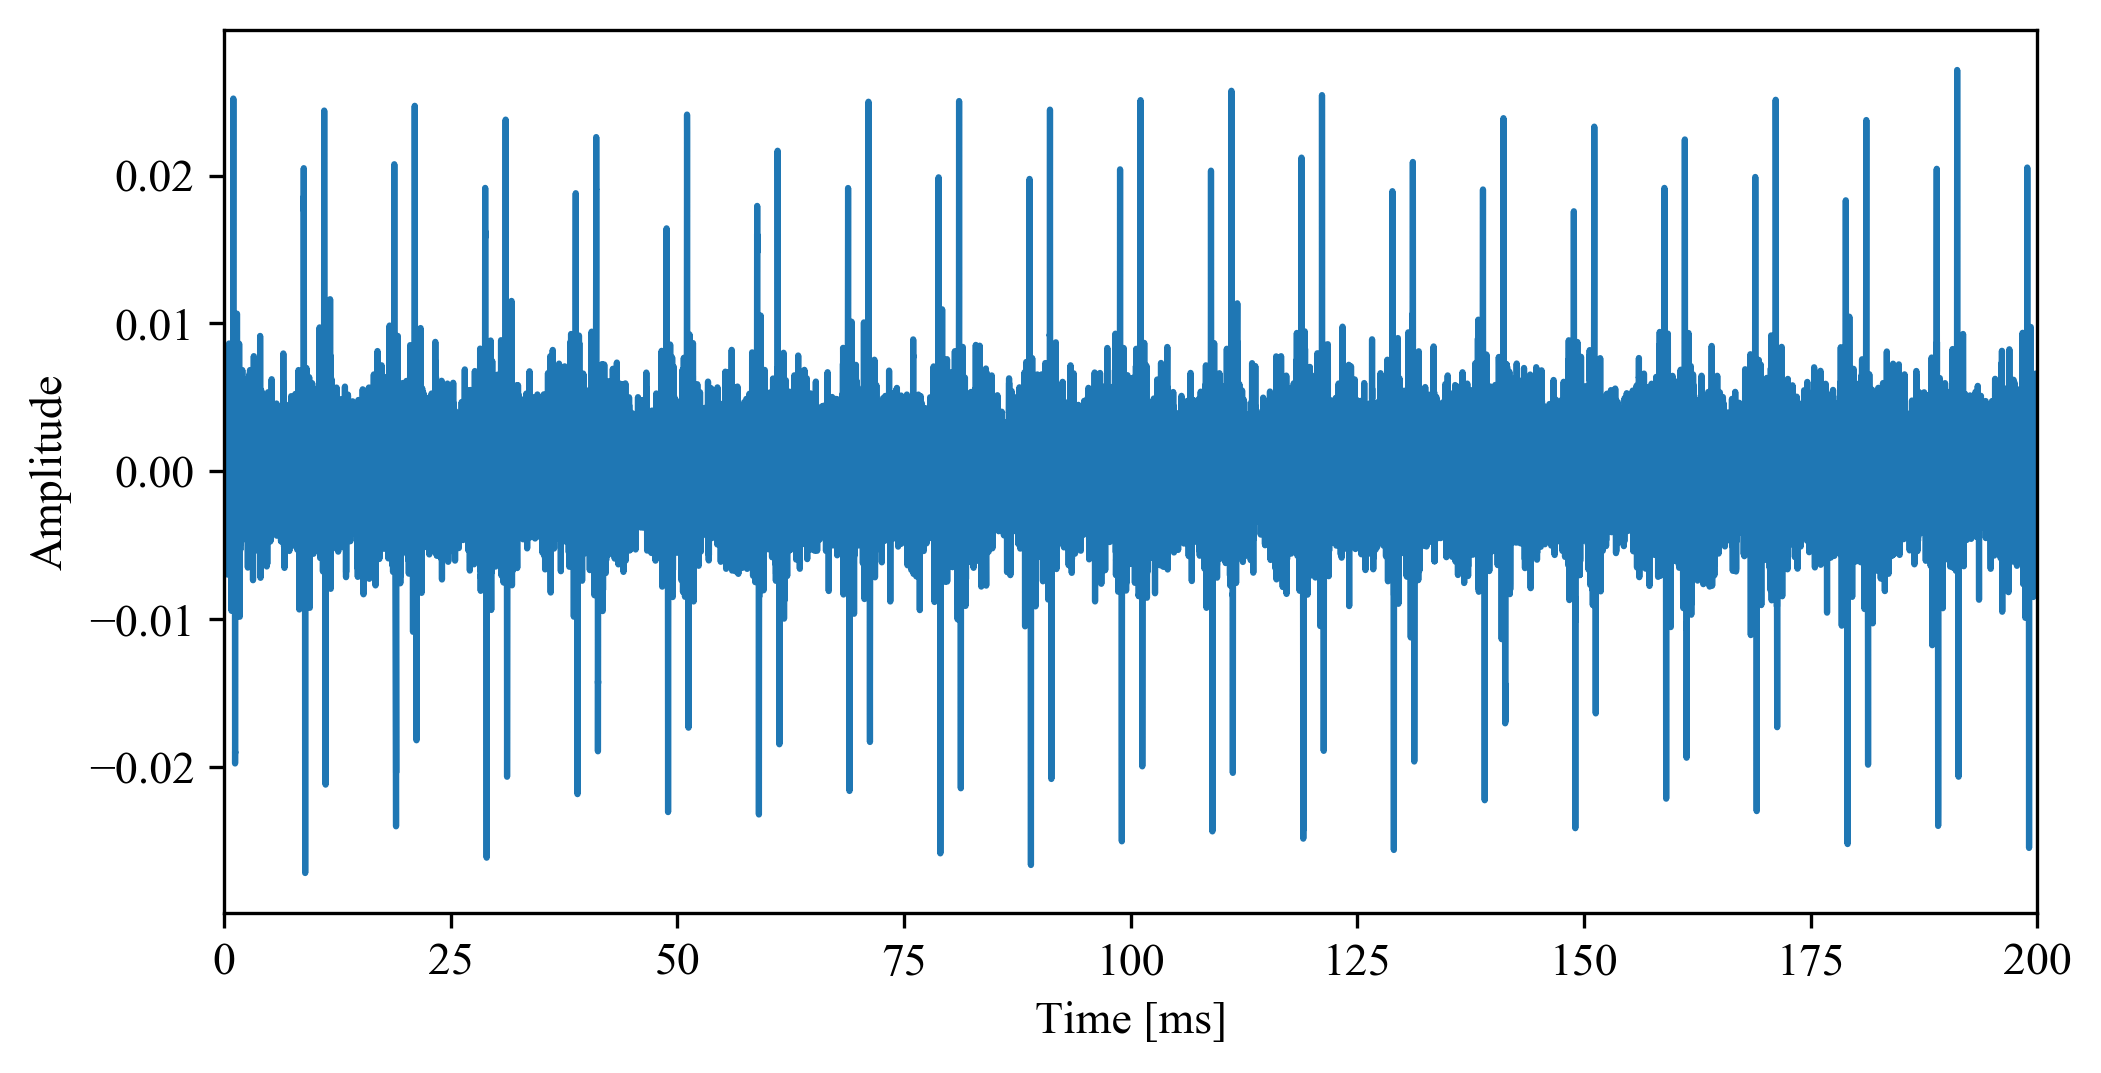

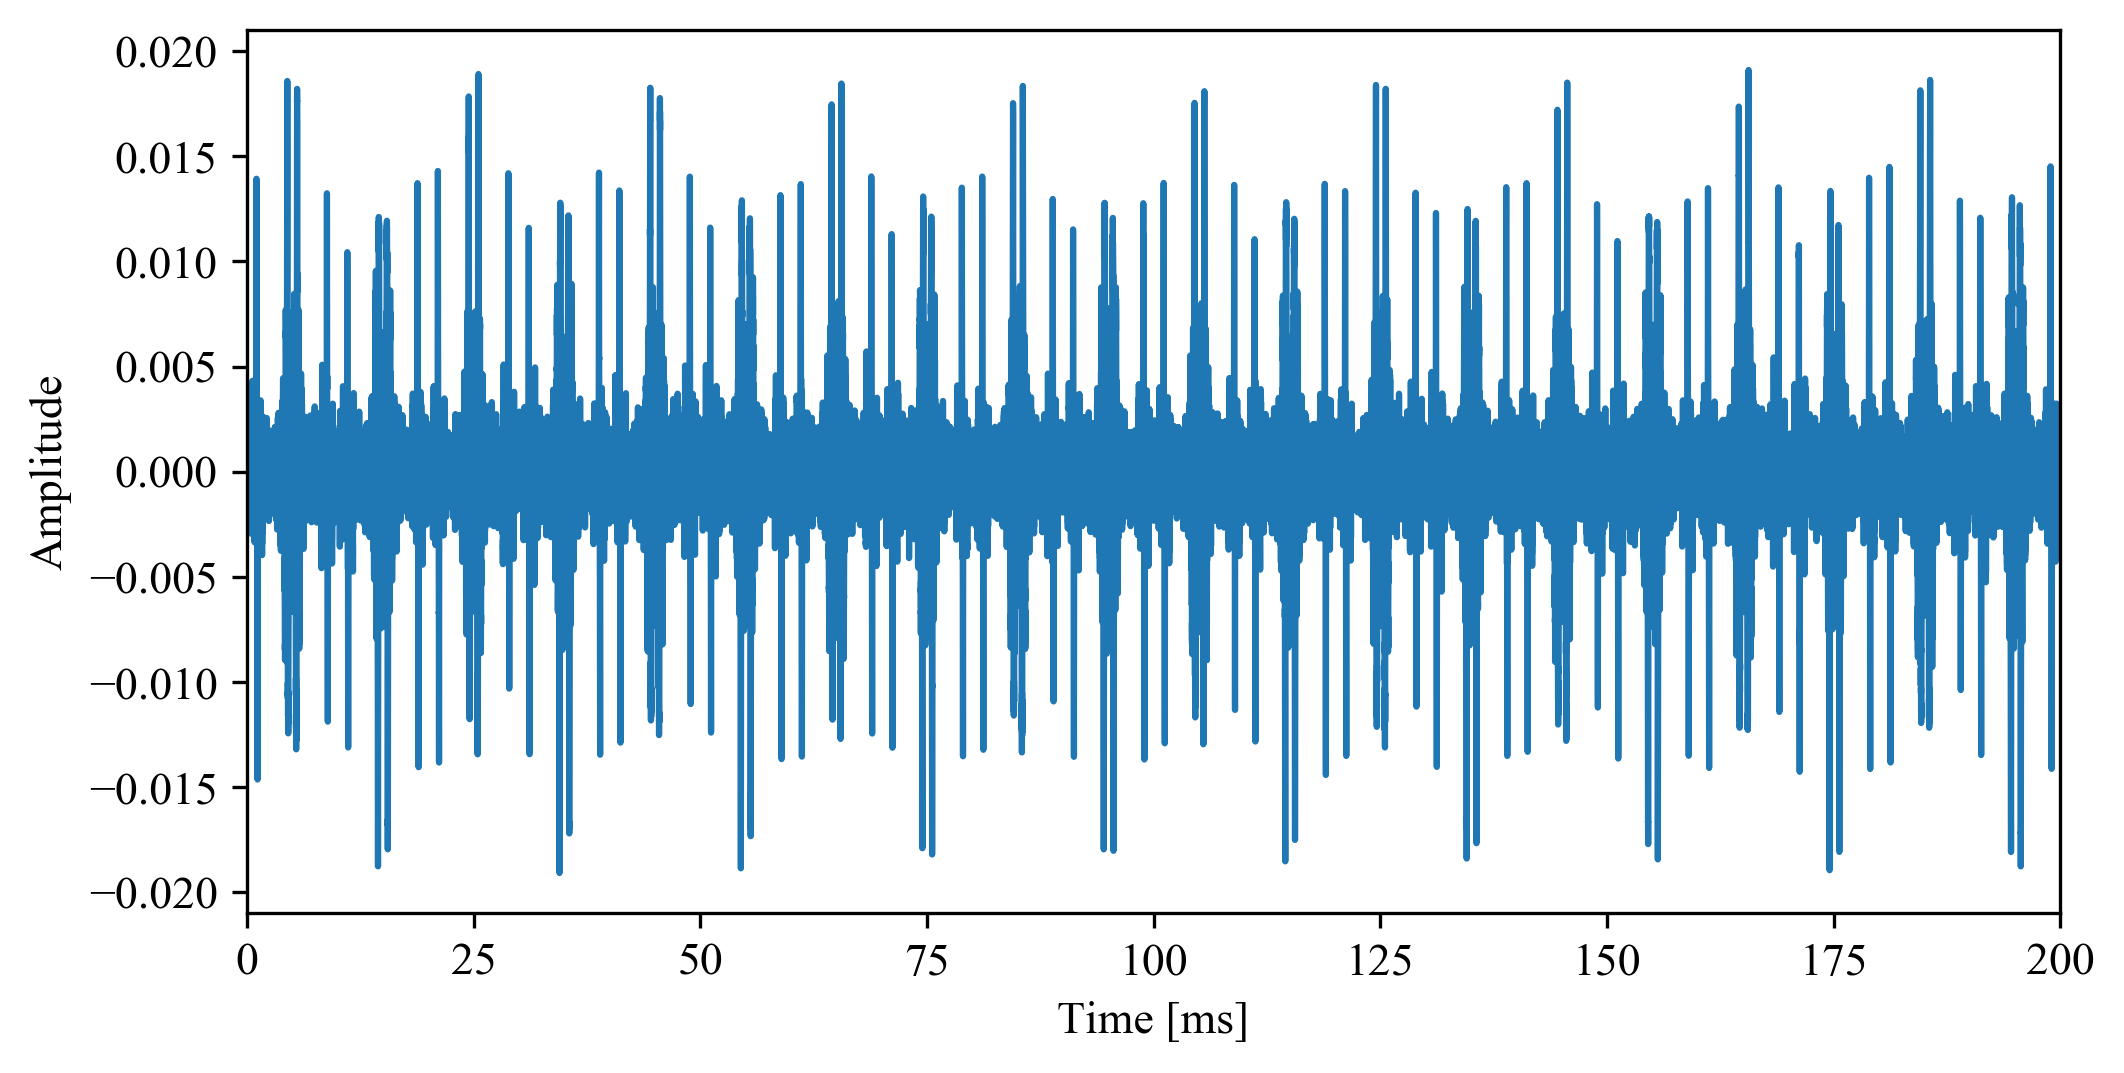

In [167]:
t = np.linspace(0, 200, 99950)

xfreq = np.arange(file2.shape[0])
xfreq *= 5
xfreq = xfreq[400:]
xfreq = xfreq[:29600]
xfreq = xfreq / 1000


fig, ax = plt.subplots()
ax.set_xlabel("Time [ms]")
ax.set_ylabel('Amplitude')
ax.plot(t, S_[:,0])
ax.set_xlim((0,200))
fig, ax = plt.subplots()
ax.set_xlabel("Time [ms]")
ax.set_ylabel('Amplitude')
ax.plot(t, S_[:,1])
ax.set_xlim((0,200))


In [180]:
t = np.linspace(0, 200, 99950)
d = {'current': S_[:,0]}
df = pd.DataFrame(data=d)
df.index = t
df.to_excel("5-7.xlsx")

In [181]:
t = np.linspace(0, 200, 99950)
d = {'current': S_[:,1]}
df = pd.DataFrame(data=d)
df.index = t
df.to_excel("5-8.xlsx")

In [168]:
s1 = S_[:,0]
s2 = S_[:,1]
#s3 = S_[:,2]

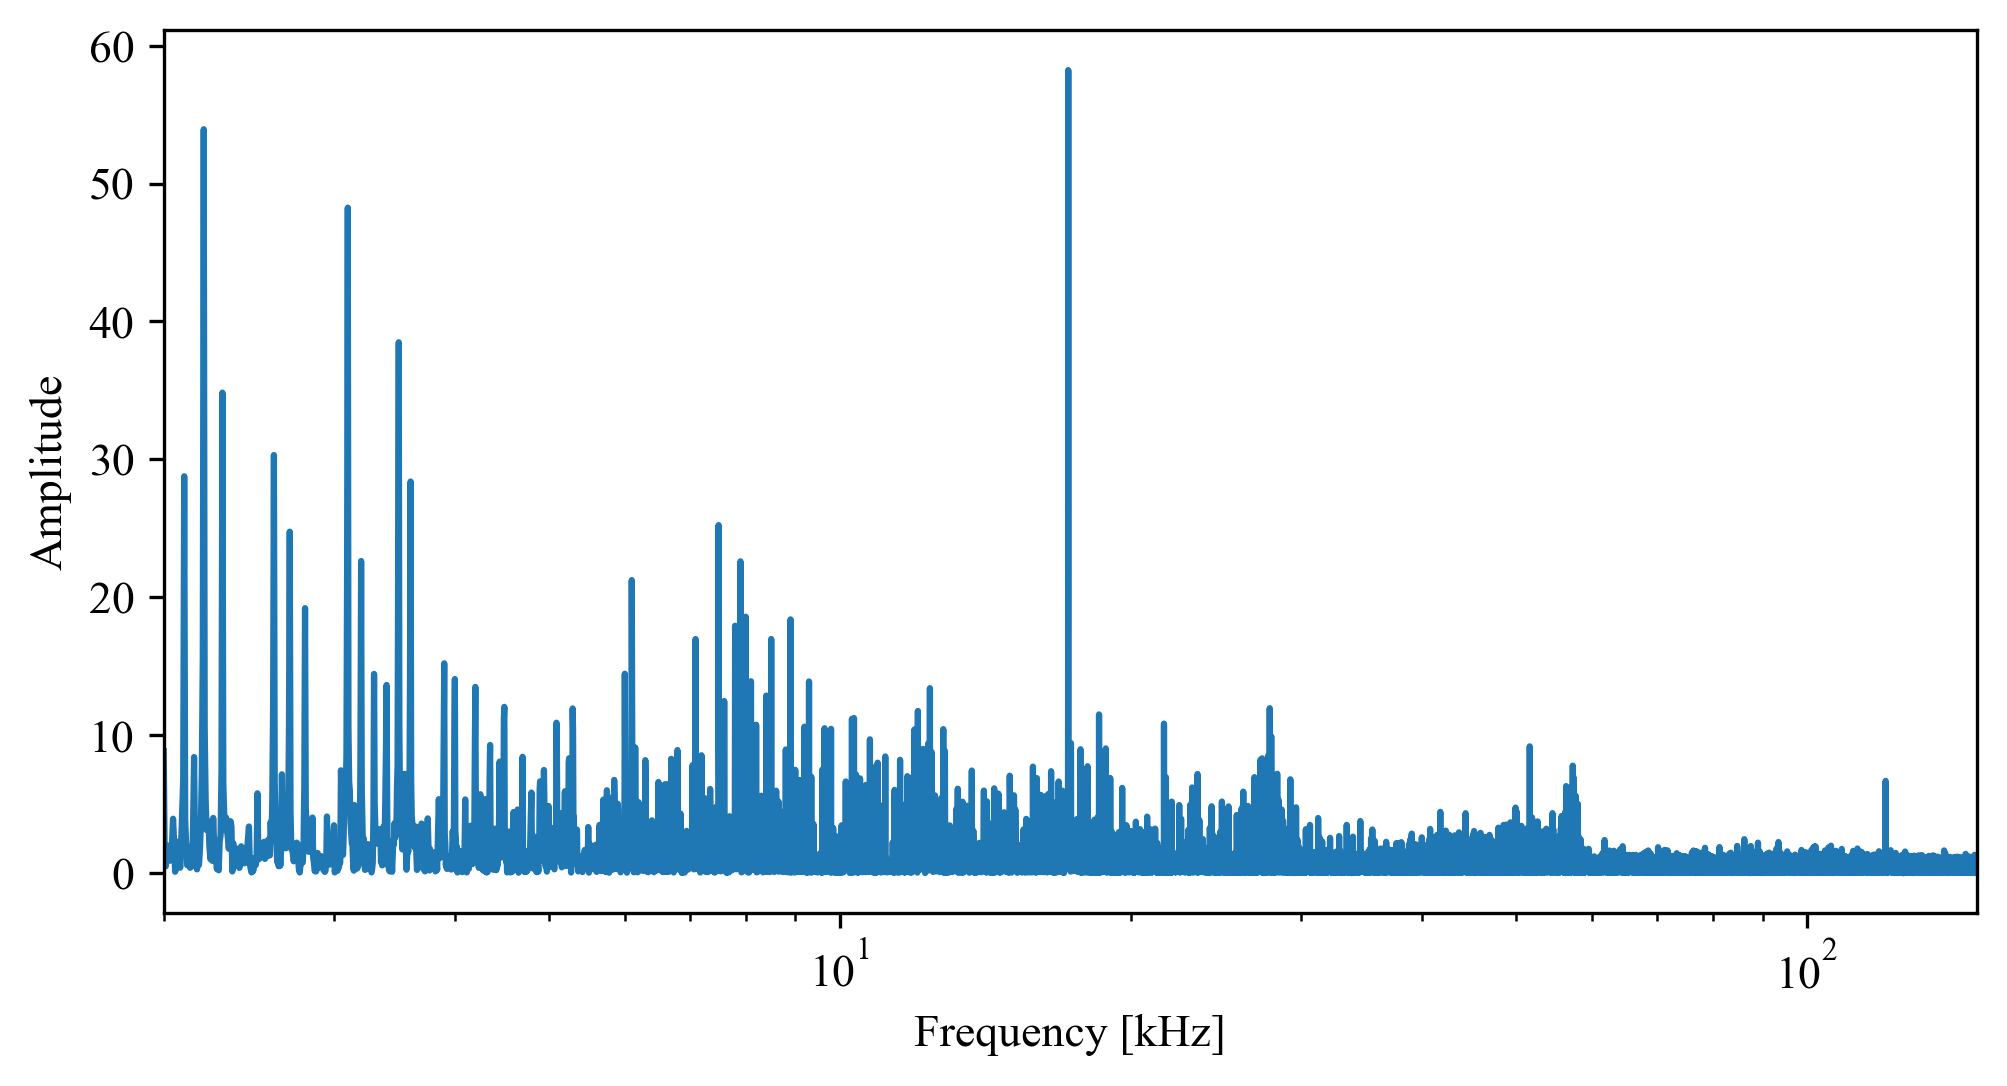

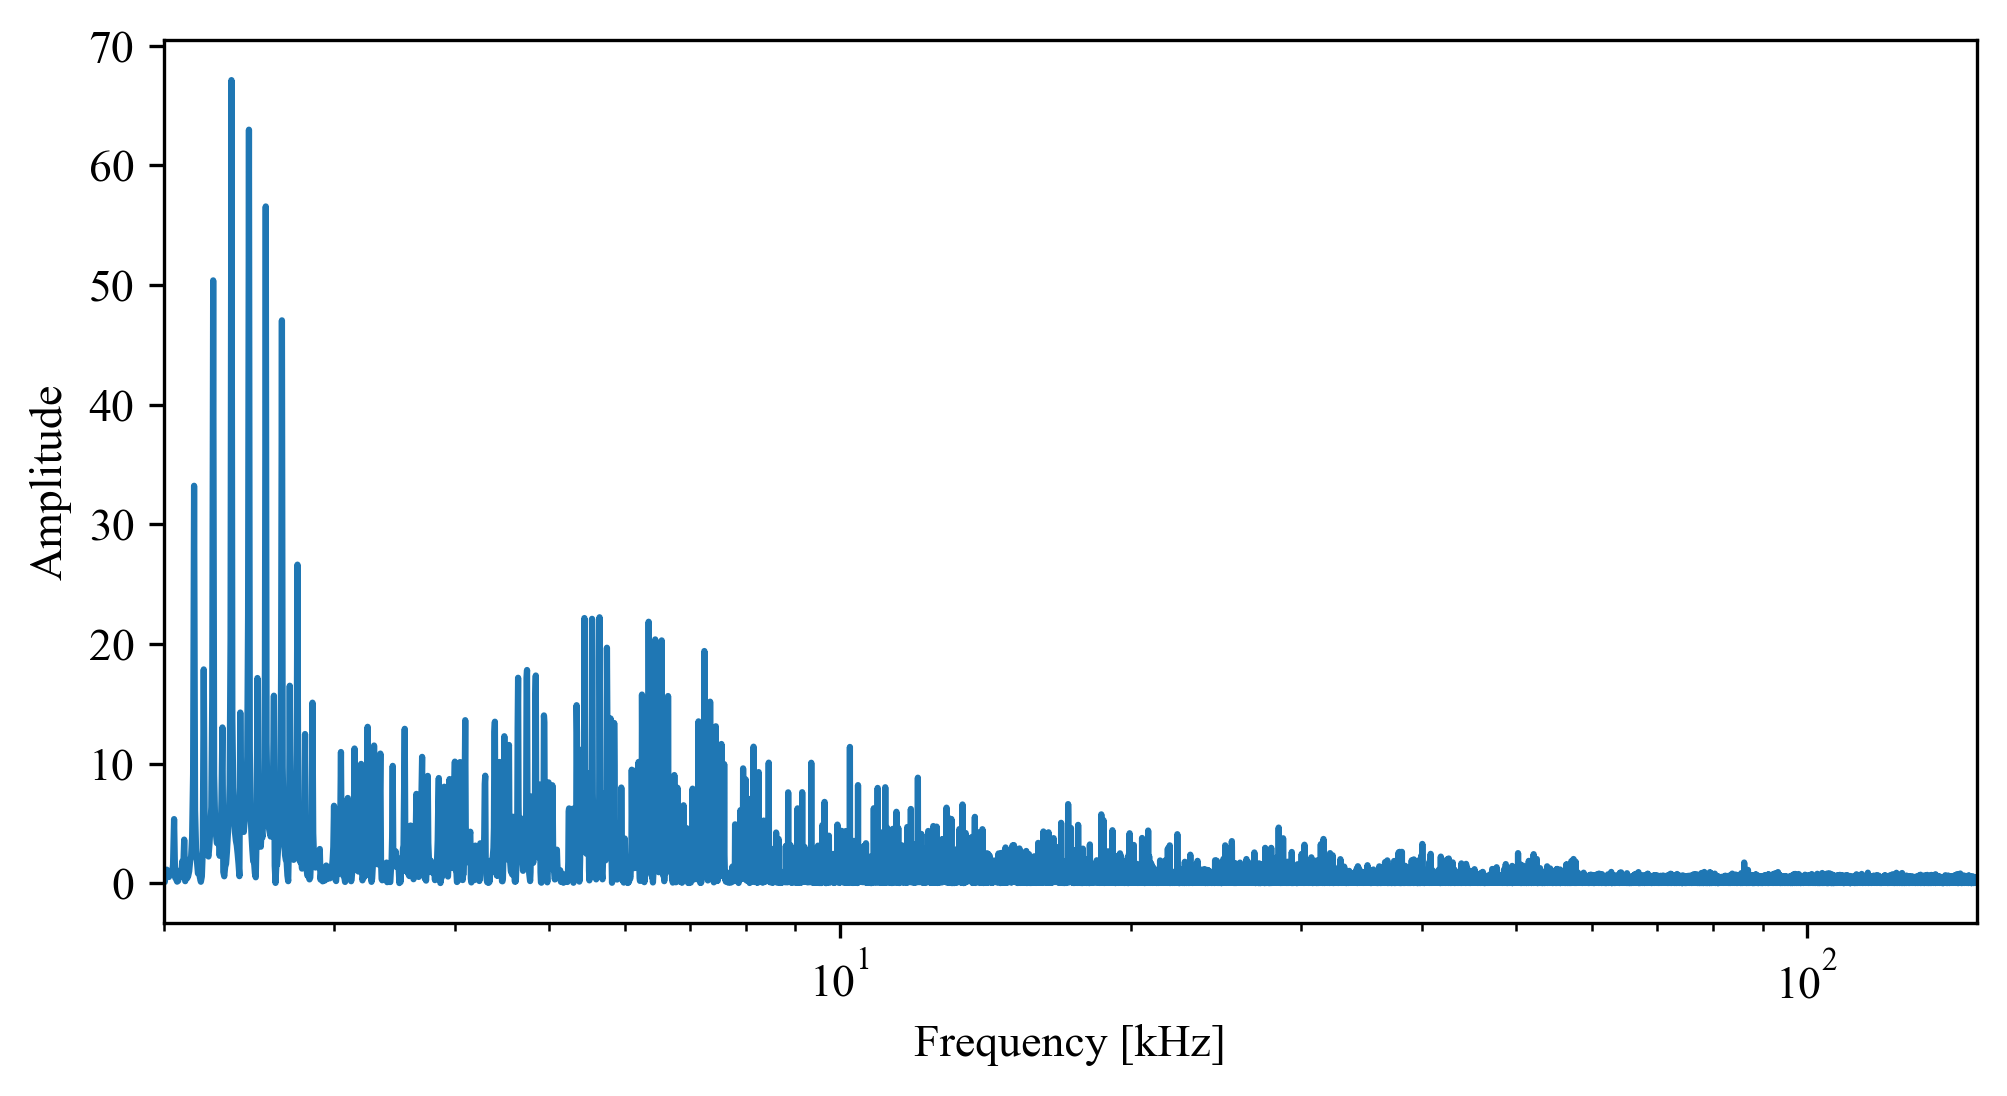

In [169]:
xfreq = np.arange(99949)
xfreq *= 5
xfreq = xfreq[400:]
xfreq = xfreq[:29600]
xfreq = xfreq / 1000

fft_s1 = np.fft.fft(s1)
absolutevals_s1 = np.absolute(fft_s1)
fig, ax = plt.subplots()
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Amplitude')
ax.set_xlim((2,150))
ax.plot(xfreq, absolutevals_s1[400:30000])
ax.set_xscale('log')
    

fft_s2 = np.fft.fft(s2)
absolutevals_s2 = np.absolute(fft_s2)
fig, ax = plt.subplots()
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Amplitude')
ax.set_xlim((2,150))
ax.plot(xfreq, absolutevals_s2[400:30000])
ax.set_xscale('log')

#fft_s3 = np.fft.fft(s3)
#absolutevals_s3 = np.absolute(fft_s3)
#fig, ax = plt.subplots()
#ax.set_xlabel("Frequency [Hz]")
#ax.set_ylabel('Current [A]')
#ax.set_xlim(1,fft_s3.shape[0] )
#ax.plot(absolutevals_s3[1:])
#ax.set_xscale('log')

In [175]:
d = {'current': absolutevals_s1[400:30000]}
df = pd.DataFrame(data=d)
df.index = xfreq
df.to_excel("5-9.xlsx")

In [176]:
d = {'current': absolutevals_s2[400:30000]}
df = pd.DataFrame(data=d)
df.index = xfreq
df.to_excel("5-10.xlsx")